# Teorema: è sempre possibile costruire un triangolo rettangolo dove i cateti sono la media geometrica e la deviazione standard di 2 valori mentre l'ipotenusa è la loro media.

## 1. Introduzione
In questo lavoro vorrei presentare un ipotesi che lega concetti di statistica elementare (media, deviazione standard, media geometrica), con una costruzione geometrica basata sul triangolo rettangolo.

## 2. Teorema principale
presi 2 valori x e y appartenenti ai reali, è sempre possibile costruire un triangolo rettangolo in cui:
* un cateto è la media geometrica dei 2 valori
* l'altro è la loro deviazione standard
* l'ipotenusa rappresenta la loro media aritmetica
* La variazione dell'area di questo triangolo usando come numeri p e 1-p con p probabilità opposte sarà una figura pari rispetto a 0.5 e formata da una struttura a gobba di cammello con minimi nei punti (0,0), (0.5,0) e (1, 0) e massimi nei punti
$$
(\frac{1}{2} - \frac{\sqrt{2}}{4}, \frac{1}{16}), (\frac{1}{2} + \frac{\sqrt{2}}{4}, \frac{1}{16})
$$

## 3. lemmi
Per dimostrare questo teorema avrò bisogno di suddividerlo in 3 lemmi:

* Il prodotto di 2 numeri può essere considerato come la differenza tra la loro media al quadrato e la loro deviazione standard al quadrato
* La media aritmetica è la distanza euclidea tra la loro media geometrica e la loro deviazione standard
* se sostituisco ai 2 valori 2 probabilità opposte, l'area del un triangolo varierà secondo una struttura a 2 gobbe di cammello, pari rispetto a 0.5 dove i massimi saranno a 0.15 e 0.85 e i minimi nei punti 0, 0.5 e 1

In [1]:
from sympy import symbols, simplify, sqrt, Interval, integrate, solveset, plot
import matplotlib_inline
from IPython.display import display

matplotlib_inline.backend_inline.set_matplotlib_formats('png')

### lemma 1: Il prodotto di 2 numeri può essere considerato come la differenza tra la loro media al quadrato e la loro deviazione standard al quadrato

#### Dimostrazione

Istanzio le variabili x e y, che rappresentano 2 incognite appartenenti al dominio dei reali

In [2]:

x, y,  = symbols('x y', real=True)
data = [x, y]

calcolo la media

In [3]:
m = sum(data)/len(data)
display(simplify(m))

x/2 + y/2

**la deviazione standard può essere vista come la radice quadrata della varianza**

calcolo la varianza

In [4]:
variance = sum([(x - m)**2 for x in data]) / len(data)
display(simplify(variance))

(x - y)**2/4

calcolo la deviazione standard

In [5]:

ds = simplify(sqrt(variance))

display(ds)

Abs(x/2 - y/2)

verifico che il prodotto tra i 2 numeri equivalga alla differenza tra la loro media al quadrato e la loro deviazione standard al quadrato

In [6]:
expr = m**2 - ds**2
display(simplify(expr) == x*y)

True

<h4><u>Abbiamo dimostrato il primo lemma.</u></h4>


### Lemmma 2: La media aritmetica è la distanza euclidea tra la loro media geometrica e la loro deviazione standard

ora sappiamo che la moltiplicazione può essere vista come la media al quadrato - la deviazione standard al quadrato

per via del lemma 1 sappiamo che 

$$
x \cdot y = \left(\frac{x+y}{2}\right)^2 - \left(\frac{|x-y|}{2}\right)^2
$$

quindi basata applicare un po di semplice algebra

$$
- \left(\frac{x+y}{2}\right)^2 =  - \left(\frac{|x-y|}{2}\right)^2 - x \cdot y
$$

$$
\left(\frac{x+y}{2}\right)^2 =  \left(\frac{|x-y|}{2}\right)^2 + x \cdot y
$$

e dato che la radice quadrata di x^2 è x

$$
\left(\frac{x+y}{2}\right)^2 =  \left(\frac{|x-y|}{2}\right)^2 + \sqrt{x \cdot y}^2
$$

Di conseguenza, la media tra i 2 numeri risulta la distanza euclidea tra la loro deviazione standard e la loro media geometrica

<h4><u>Abbiamo dimostrato il secondo lemma</u></h4>


Quindi **è sempre possibile creare un triangolo rettangolo dove i cateti saranno la media geometrica dei 2 valori e la loro deviazione standard, mentre l'ipotenusa sarà la media.**

Inoltre, dato che la media tra 2 probabilità opposte p e 1-p è sempre 0.5, sappiamo che **sostituendo ad x e y 2 probabilità reciproche avremo sempre un triangolo rettangolo di ipotenusa 0.5.**

Ma questo triangolo rettangolo ha un senso statisticamente parlando ?

### Lemma 3: se sostituisco ai 2 valori 2 probabilità opposte, l'area del un triangolo varierà secondo una struttura a 2 gobbe di cammello, pari rispetto a 0.5 dove i massimi saranno a 0.15 e 0.85 e i massimi saranno nei punti 0, 0.5 e 1

Calcoliamo l'area di questo triangolo in funzione di x e y

In [7]:
c1 = sqrt(x*y)
c2 = ds

area = c1*c2/2

print("l'area del triangolo si può calcolare come:")

display(area)

l'area del triangolo si può calcolare come:


sqrt(x*y)*Abs(x/2 - y/2)/2

p rappresenta la probabilità, sarà un numero reale compreso tra 0 e 1

In [8]:
p = symbols('p', real=True, domain=Interval(0, 1))

effettuiamo la seguente sostituzione {x: p, y: 1-p}

In [9]:
areaP = area.subs({x: p, y: (1-p)})
display(areaP)

sqrt(p*(1 - p))*Abs(p - 1/2)/2

sqrt(p*(1 - p))*Abs(p - 1/2)/2

Ora stampiamo il grafico dell'andamento dell'area al variare di p

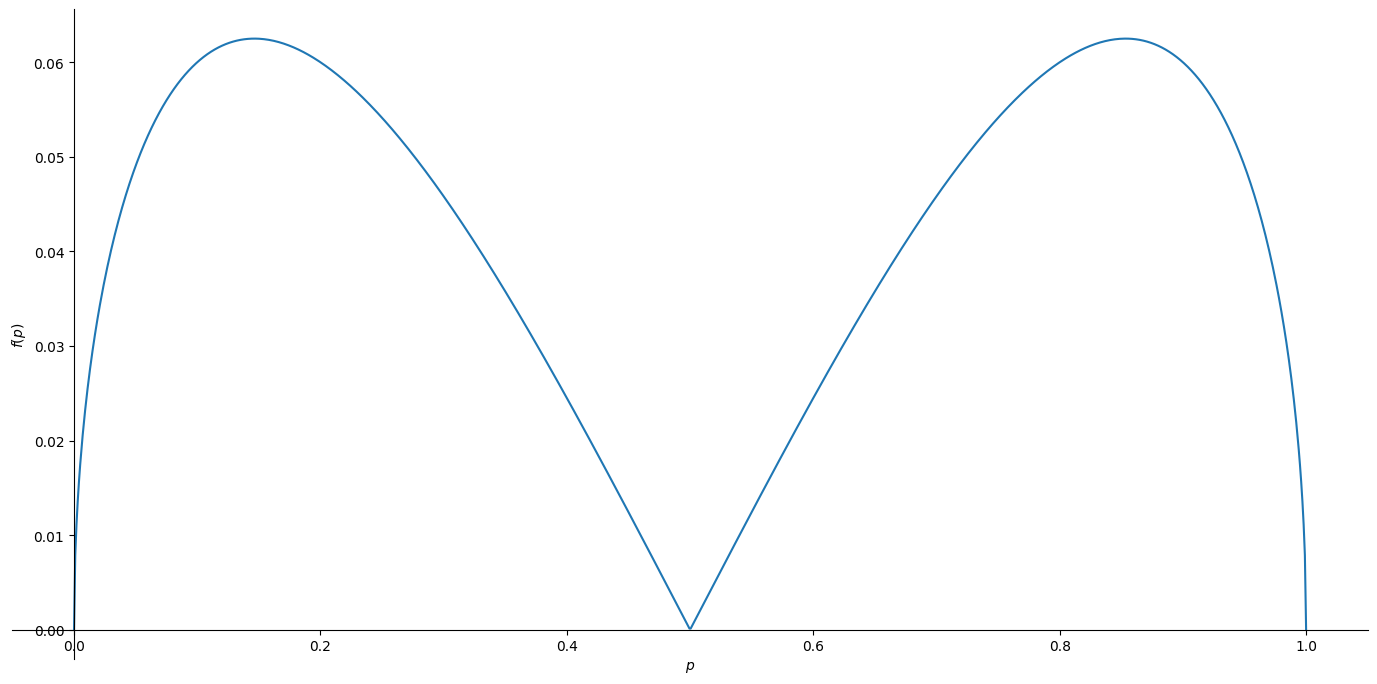

In [10]:
plot(areaP, (p, 0, 1), size=(14, 7))


Dal grafico della funzione stampato qui sopra si può notare una struttura a doppia gobba di cammello che ha i suoi massimi attorno a 0.15 e 0.85 mentre i suoi minimi a 0, 0.5 e 1

provo a calcolarne la derivata per avere i valori esatti dei massimi e minimi

In [11]:
areap_differentiate = simplify(areaP.diff(p))
display(areap_differentiate)

Piecewise((0, Eq(p, 1/2)), (sqrt(p*(1 - p))*(16*p**3 - 24*p**2 + 10*p - 1)/(8*p*(p - 1)*Abs(2*p - 1)), True))

In [16]:
solutions = list(solveset(areap_differentiate, p, domain=Interval(-.1, 1.1))) + [0, 1]

print('Punti in cui la derivata si annulla:')

for i, zero in enumerate(solutions):
  value = areaP.subs({p: zero})
  print(f'p[{i}]: ({simplify(zero)}, {simplify(value)})')

Punti in cui la derivata si annulla:
p[0]: (1/2, 0)
p[1]: (1/2 - sqrt(2)/4, 1/16)
p[2]: (sqrt(2)/4 + 1/2, 1/16)
p[3]: (0, 0)
p[4]: (1, 0)


Di regola dovrei calcolare la derivata seconda per capire veramente questi punti, ma qui abbiamo il grafico già disegnato e possiamo vedere da li se si trattano punti di massimo o di minimo

Per completezza (ma non dovrebbe interessarci ai fini di questo teorema) disegnamo anche la derivata

<h4><u>Abbiamo dimostrato il terzo lemma</u></h4>


A questo punto possiamo affermare laveridicità del teorema enunciato al punto 2:

**presi 2 valori x e y appartenenti ai reali, è sempre possibile costruire un triangolo rettangolo in cui:**
* un cateto è la media geometrica dei 2 valori
* l'altro è la loro deviazione standard
* l'ipotenusa rappresenta la loro media aritmetica
* La variazione dell'area di questo triangolo usando come numeri p e 1-p con p probabilità opposte sarà una figura pari rispetto a 0.5 e formata da una struttura a gobba di cammello con minimi nei punti (0,0), (0.5,0) e (1, 0) e massimi nei punti
$$
(\frac{1}{2} - \frac{\sqrt{2}}{4}, \frac{1}{16}), (\frac{1}{2} + \frac{\sqrt{2}}{4}, \frac{1}{16})
$$

**plus: per completezza vediamo la derivata e l'integrale integrale**

<lambdifygenerated-7>:2: RuntimeWarning: invalid value encountered in scalar divide
  return select([equal(p, 1/2),True], [0,(1/8)*sqrt(p*(1 - p))*(16*p**3 - 24*p**2 + 10*p - 1)/(p*(p - 1)*abs(2*p - 1))], default=nan)


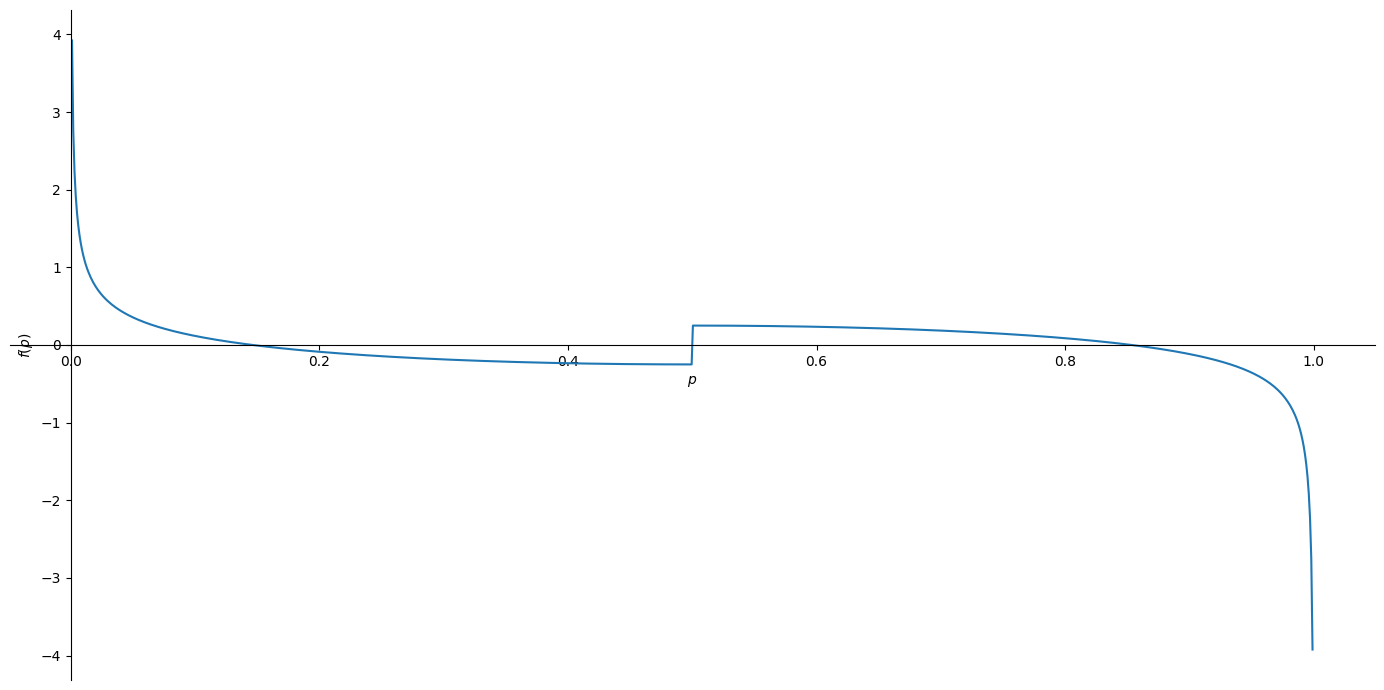

In [17]:
# grafico derivata
plot(areap_differentiate, (p, 0, 1), size=(14, 7))


In [18]:
# calcolo integrale
areaP_integrate = integrate(areaP, p)

display(simplify(areaP_integrate))

Piecewise(((p*(1 - p))**(3/2)/6, p <= 1/2), (p**2*sqrt(p*(1 - p))/6 - p*sqrt(p*(1 - p))/6 + 1/24, True))

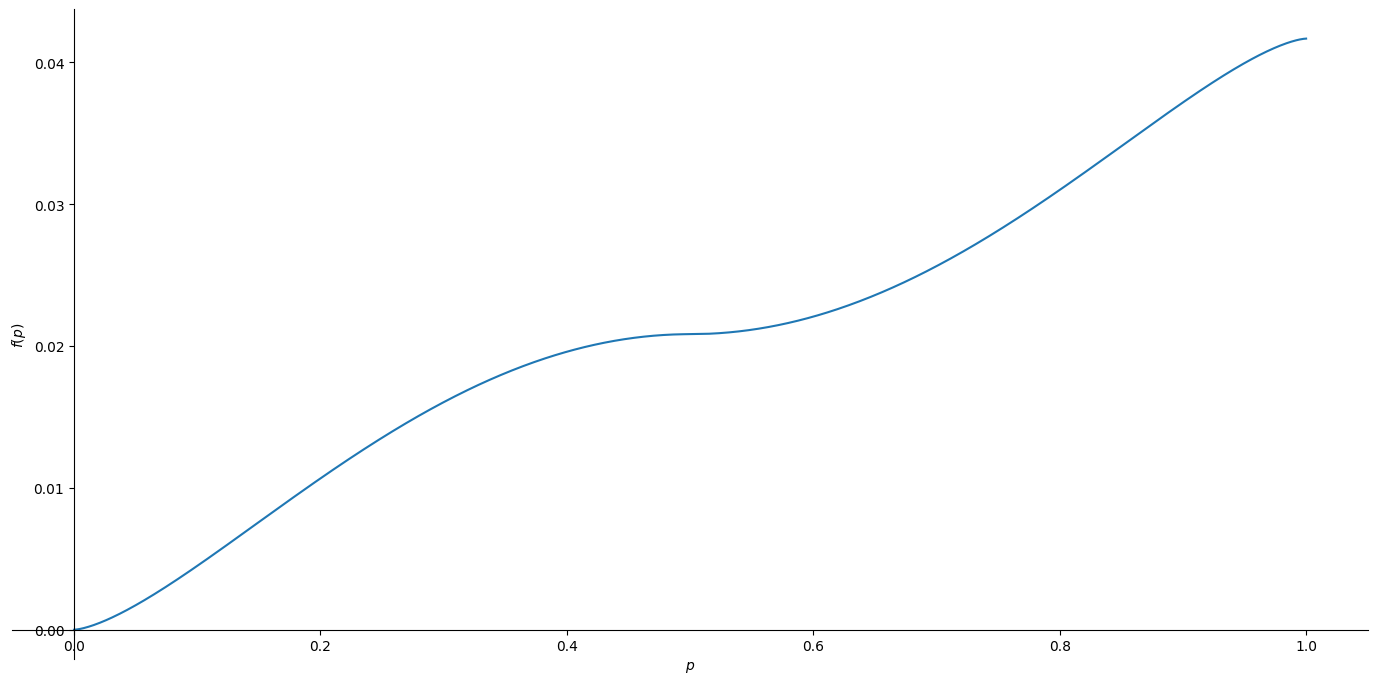

In [19]:
# grafico integrale
plot(areaP_integrate, (p, 0, 1), size=(14, 7))